## Контрольное практическое задание

В этом задании вам нужно будет проанализировать корпус новостных статей, размеченных по темам, а затем обучить несколько классификаторов и сравнить качество их работы. В конце нужно будет сгенерировать три статьи и определить тему статей с помощью лучшего классификатора.

In [ ]:
import pandas as pd
# прочитаем csv-корпус и посмотрим на его содержимое
df_news = pd.read_csv('news.csv')
df_news.head()

,source,title,text,publication_date,rubric,subrubric,tags
0,lenta.ru,Синий богатырь,В 1930-е годы Советский Союз охватила лихорадк...,2020-08-30T00:01:00+03:00,Экономика,Госэкономика,NaN
1,lenta.ru,Загитова согласилась вести «Ледниковый период»,Олимпийская чемпионка по фигурному катанию Ал...,2020-08-31T20:04:00+03:00,Спорт,Зимние виды,NaN
2,lenta.ru,Объяснена опасность однообразного питания,Российский врач-диетолог Римма Мойсенко объясн...,2020-08-31T20:07:00+03:00,Из жизни,Еда,NaN
3,lenta.ru,«Предохраняться? А зачем?»,В 2019 году телеканал «Ю» запустил адаптацию з...,2020-08-30T00:04:00+03:00,Интернет и СМИ,ТВ и радио,NaN
4,lenta.ru,Ефремов систематически употреблял наркотики,Актер Михаил Ефремов систематически употребл...,2020-08-31T18:27:00+03:00,Культура,Кино,NaN


In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# если у вас возникнут проблемы со шрифтами, раскомментируйте нижние две строчки и обновите библиотеку Pillow
# %pip install --upgrade pip
# %pip install --upgrade Pillow

### Задание 1
Сначала напишите функции `str_corpus` (получение общей текстовой строки из списка слов) и `get_corpus` (получение списка всех слов в корпусе).    
С помощью библиотеки `wordcloud` напишите функцию, генерирующую облако только значимых слов.    
Затем постройте и отобразите
- общее облако слов по всему корпусу
- три облака слов по любым трём темам
  
на графике с помощью matplotlib.

In [45]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [59]:
stopwords = set(stopwords.words('russian'))

<Axes: >

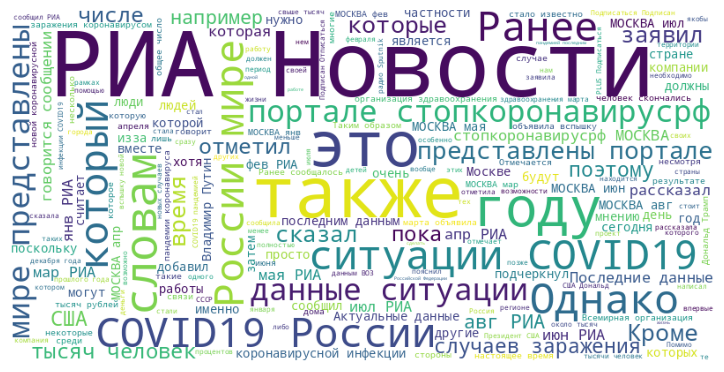

In [66]:
# Получение текстовой строки из списка слов
def str_corpus(corpus: list) -> str:
    return ' '.join([word for word in corpus if word.lower() not in stopwords])

# Получение списка всех слов в корпусе
def get_corpus(data: pd.DataFrame) -> list:
    tokens = []
    [tokens.extend(word_tokenize(s)) for s in data.text]
    return [re.sub(r'[^\w\s]', '', token) for token in tokens\
            if re.sub(r'[^\w\s]', '', token)]

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(width=800, height=400, background_color='white')\
    .generate(str_corpus(corpus))
    return wordCloud


corpus = get_corpus(df_news)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

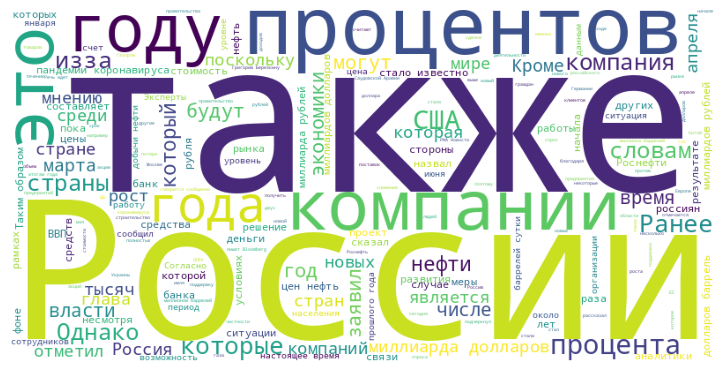

In [70]:
corpus_ec = get_corpus(df_news[df_news.rubric == 'Экономика'])
procWordCloud = get_wordCloud(corpus_ec)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

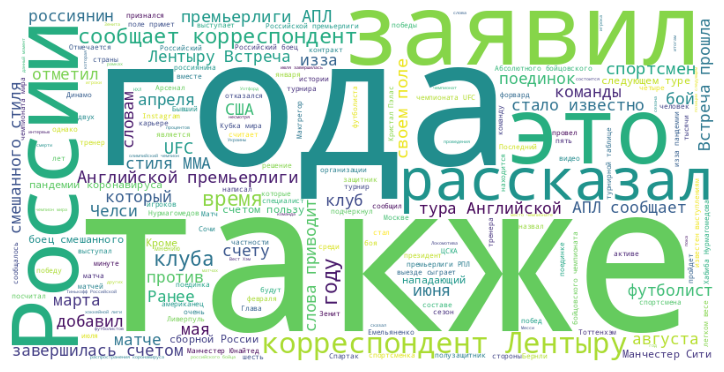

In [71]:
corpus_sp = get_corpus(df_news[df_news.rubric == 'Спорт'])
procWordCloud = get_wordCloud(corpus_sp)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

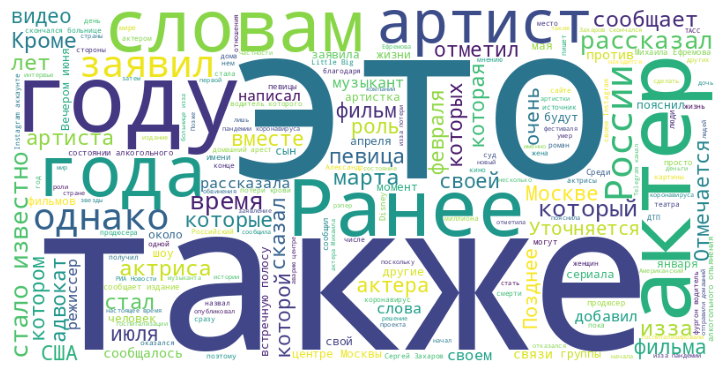

In [76]:
corpus_si = get_corpus(df_news[df_news.rubric == 'Культура'])
procWordCloud = get_wordCloud(corpus_si)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

### Задание 2  

В первой строке укажите данные для обучения на месте многоточий: первый аргумент — значения из колонки `text` из нашего датафрейма, второй аргумент — значения из колонки `rubric` нашего датафрейма.  
Если у вас возникнет ошибка с неправильным типом данных используйте к выборке из датафрейма функцию `.astype('U')`.

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df_news.text.astype('U'), df_news.rubric.astype('U'), test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Задание 3  
1. Обучите поочерёдно все 6 классификаторов, импортированных ниже, на данных `X_train, y_train` с помощью функции `fit()`
2. Предскажите темы для новостей из `X_test` с помощью функции `predict()`
3. Выведите `classification_report` для каждого классификатора (сравните предсказанные темы с темами из `y_test`)
4. Проанализируйте результаты и выберите лучший классификатор, приведя аргументы.

In [83]:
# pipeline позволяет объединить в один блок трансформер и модель, что упрощает написание кода и улучшает его читаемость
from sklearn.pipeline import Pipeline

# TfidfVectorizer преобразует тексты в числовые вектора, отражающие важность использования каждого слова из некоторого набора слов (количество слов набора определяет размерность вектора) в каждом тексте
from sklearn.feature_extraction.text import TfidfVectorizer

# разные классификаторы
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# набор метрик для оценки качества модели
from sklearn import metrics

In [88]:
clfs = {
    'logistic reg': LogisticRegression(random_state=42, max_iter=1000),
    'k neighbors': KNeighborsClassifier(),
    'decision tree': DecisionTreeClassifier(random_state=42),
    'sgd': SGDClassifier(random_state=42),
    'multinomial': MultinomialNB(),
    'random forest': RandomForestClassifier(random_state=42)
}

tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.9,
    ngram_range=(1, 2),
    max_features=10000,
    norm='l2',
    use_idf=True
)

best_acc = 0
best_clf_name = ''
best_clf = None

for name, clf in clfs.items():
    classifier = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('clf', clf)
    ])
    classifier.fit(X_train, y_train)

    pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, pred)
    report = metrics.classification_report(y_test, pred)

    print('=' * 100)
    print(f'classifier: {name}')
    print(f'accuracy: {acc}')
    print('-' * 100)
    print(report)
    print('-' * 100)

    if acc > best_acc:
        best_acc = acc
        best_clf_name = name
        best_clf = classifier

print(f'best classifier: {best_clf_name} with accuracy {best_acc}')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


classifier: logistic reg
accuracy: 0.8690079466803384
----------------------------------------------------------------------------------------------------
                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00         5
              nan       0.88      1.00      0.93      3064
      Бывший СССР       0.79      0.52      0.62        64
              Дом       0.75      0.16      0.26        19
         Из жизни       1.00      0.37      0.54        35
   Интернет и СМИ       0.50      0.02      0.04        45
         Культура       0.83      0.13      0.22        39
              Мир       0.75      0.49      0.59       123
  Наука и техника       1.00      0.04      0.08        50
       Нацпроекты       1.00      0.38      0.55         8
      Путешествия       1.00      0.18      0.30        34
           Россия       0.66      0.45      0.54       177
Силовые структуры       0.83      0.43      0.57        35
            Спорт 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


classifier: k neighbors
accuracy: 0.8387592924891054
----------------------------------------------------------------------------------------------------
                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00         5
              nan       0.84      0.99      0.91      3064
      Бывший СССР       0.76      0.34      0.47        64
              Дом       1.00      0.21      0.35        19
         Из жизни       0.64      0.26      0.37        35
   Интернет и СМИ       0.45      0.11      0.18        45
         Культура       0.62      0.13      0.21        39
              Мир       0.70      0.31      0.43       123
  Наука и техника       0.64      0.14      0.23        50
       Нацпроекты       0.67      0.50      0.57         8
      Путешествия       0.86      0.18      0.29        34
           Россия       0.75      0.23      0.35       177
Силовые структуры       0.75      0.34      0.47        35
            Спорт  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


classifier: sgd
accuracy: 0.8969495001281723
----------------------------------------------------------------------------------------------------
                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00         5
              nan       0.91      0.99      0.95      3064
      Бывший СССР       0.81      0.73      0.77        64
              Дом       0.71      0.26      0.38        19
         Из жизни       0.81      0.63      0.71        35
   Интернет и СМИ       0.73      0.18      0.29        45
         Культура       0.91      0.26      0.40        39
              Мир       0.68      0.61      0.64       123
  Наука и техника       0.90      0.18      0.30        50
       Нацпроекты       1.00      0.50      0.67         8
      Путешествия       1.00      0.44      0.61        34
           Россия       0.72      0.53      0.61       177
Силовые структуры       0.80      0.57      0.67        35
            Спорт       0.9

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


classifier: multinomial
accuracy: 0.7997949243783645
----------------------------------------------------------------------------------------------------
                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00         5
              nan       0.80      1.00      0.89      3064
      Бывший СССР       1.00      0.03      0.06        64
              Дом       0.00      0.00      0.00        19
         Из жизни       0.00      0.00      0.00        35
   Интернет и СМИ       0.00      0.00      0.00        45
         Культура       0.00      0.00      0.00        39
              Мир       1.00      0.06      0.11       123
  Наука и техника       0.00      0.00      0.00        50
       Нацпроекты       0.00      0.00      0.00         8
      Путешествия       0.00      0.00      0.00        34
           Россия       0.75      0.03      0.06       177
Силовые структуры       1.00      0.03      0.06        35
            Спорт  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Лучший классификатор - SDG

### Задание 4  
Сгенерируйте три новости на основе трёх облак слов из задания 1 с помощью ChatGPT, [бота в телеграме](https://t.me/gpt3_unlim_chatbot), https://chatgptchatapp.com/ или любой другой доступной нейросети (приложите их ниже) и проверьте, правильно ли ваш лучший классификатор определит их тему (результат также укажите ниже).  

Можно использовать, например, следующий промпт:  
*напиши короткую новость на основе облака самых частых слов*

Я использовал hugging face (https://huggingface.co/chat/), используя инструмент vision (https://hf.co/chat/tools/66e85bb396d054c5771bc6cb)

In [89]:
news = [
    'Экономисты также отмечают рост экономики России. Стало известно, что ситуация в России, по словам компании "Роснефть", улучшилась в сравнении с прошлым годом, несмотря на пандемию коронавируса. Также эксперты отмечают, что цены на нефть могут повлиять на ситуацию в стране.',
    'Российский боец смешанного стиля MMA заявил, что проведет бой в следующем туре. Корреспондент "Ленты.ру" сообщает также о матче сборной России в английской премьер-лиге. Стало известно о встрече клуба, который выступал ранее против "Челси".',
    'Актер из России, по словам артиста, расскажет о своей роли в фильме, который может выйти в этом году. Также стало известно, что в Москве скоро пройдет фестиваль, однако дата уточняется. Ранее сообщалось о состоянии здоровья одного из актеров.'
]

pred = best_clf.predict(news)

print(pred)


['Экономика' 'Спорт' 'Культура']


Да, все так же